In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits() 

In [2]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [4]:
print(digits.target[0])

0


In [7]:
len(digits.images)

1797

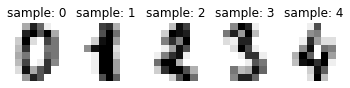

In [8]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]): # 5개의 샘플만 출력
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i' % label)

In [10]:
for i in range(5):
    print(i, 'label: ', digits.target[i])

0 label:  0
1 label:  1
2 label:  2
3 label:  3
4 label:  4


In [11]:
X = digits.data
Y = digits.target

In [14]:
import torch
import torch.nn as nn
from torch import optim

In [16]:
model = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)

In [19]:
X = torch.tensor(X, dtype = torch.float32)
Y = torch.tensor(Y, dtype = torch.int64)

loss_func = nn.CrossEntropyLoss() # softmax 함수와 signoid or NLL (역 로그 함수)의 조합
optimizer = optim.Adam(model.parameters())
losses = []

<ipython-input-19-9c67f360e497>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype = torch.float32)
<ipython-input-19-9c67f360e497>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y = torch.tensor(Y, dtype = torch.int64)


In [22]:
for epoch in range(101):
    optimizer.zero_grad() # 0으로 초기화하는 역할 (안하면 오류 발생)
    y_pred = model(X) # forward 연산 (!= backpropagation)
    loss = loss_func(y_pred, Y)
    loss.backward()
    optimizer.step()
       
    if epoch % 10 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, 100, loss.item()))
        losses.append(loss.item())

Epoch    0/100 Cost: 0.202024
Epoch   10/100 Cost: 0.167275
Epoch   20/100 Cost: 0.141742
Epoch   30/100 Cost: 0.122247
Epoch   40/100 Cost: 0.106830
Epoch   50/100 Cost: 0.094528
Epoch   60/100 Cost: 0.084425
Epoch   70/100 Cost: 0.076033
Epoch   80/100 Cost: 0.068787
Epoch   90/100 Cost: 0.062439
Epoch  100/100 Cost: 0.056861


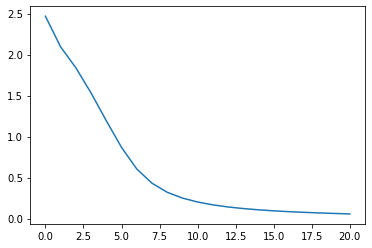

In [23]:
plt.plot(losses)